In [1]:
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.models import Model  
import numpy as np
import pandas as pd

In [2]:
# last layer
model = VGG16(weights="imagenet", include_top=False)

In [5]:
model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, None, None, 3)]   0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, None, None, 64)    1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, None, None, 64)    36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, None, None, 64)    0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, None, None, 128)   73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, None, None, 128)   147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, None, None, 128)   0     

# Get VGG-16 Layer Name

In [4]:
# Get all filter layers name
# Convolutional layers name likes "block#_conv#"
for layer in model.layers:
    if 'conv' not in layer.name:
        continue
    
    # Get filter weights
    filters, bias = layer.get_weights()
    print(layer.name, filters.shape)

block1_conv1 (3, 3, 3, 64)
block1_conv2 (3, 3, 64, 64)
block2_conv1 (3, 3, 64, 128)
block2_conv2 (3, 3, 128, 128)
block3_conv1 (3, 3, 128, 256)
block3_conv2 (3, 3, 256, 256)
block3_conv3 (3, 3, 256, 256)
block4_conv1 (3, 3, 256, 512)
block4_conv2 (3, 3, 512, 512)
block4_conv3 (3, 3, 512, 512)
block5_conv1 (3, 3, 512, 512)
block5_conv2 (3, 3, 512, 512)
block5_conv3 (3, 3, 512, 512)


# Visualize Filter

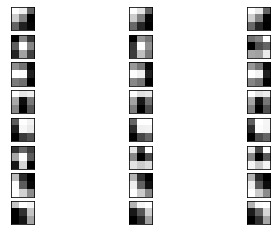

In [18]:
from matplotlib import pyplot

filters, biases = model.layers[1].get_weights()

# normalize filter value from 0-1 so can visualize it 
f_min, f_max = filters.min(), filters.max()
filters = (filters-f_min) / (f_max - f_min)

# We only dispaly first 8
n_filters, ix = 8, 1

#fig = pyplot.figure(figsize=(20, 12))

for i in range(n_filters):
    # get the filter
    f = filters[:, :, :, i]
    
    # plot each channel separately
    for j in range(3):
        ax = pyplot.subplot(n_filters, 3, ix)
        ax.set_xticks([])
        ax.set_yticks([])
        
        # Plot filter channel in grayscale
        pyplot.imshow(f[:, :, j], cmap='gray')
        ix += 1
        
# show the figure
pyplot.show()

# Extract Feature Map

The activation maps, called feature maps, capture the result of applying the filters to input, such as the input image or another feature map. 

In [28]:
from keras.preprocessing.image import img_to_array
from numpy import expand_dims

img_path = '../py/img_train/pos/2_A.jpg'


def draw_feature_map(img_path):
    img_resize = (1024, 1024)

    img = image.load_img(img_path, target_size=img_resize)

    img = img_to_array(img)
    img = expand_dims(img, axis=0)
    img = preprocess_input(img)

    # Get feature map for the first hidden layer
    feature_maps = model.predict(img)
    fig = pyplot.figure(figsize=(20, 16))

    square = 8
    ix = 1
    for _ in range(square):
        for _ in range(square):
            # specify subplot and turn off axis
            ax = pyplot.subplot(square, square, ix)
            ax.set_xticks([])
            ax.set_yticks([])

            # plot filter channel in grayscale
            pyplot.imshow(feature_maps[0, :, :, ix-1])
            ix += 1

    # show the figure
    pyplot.show()

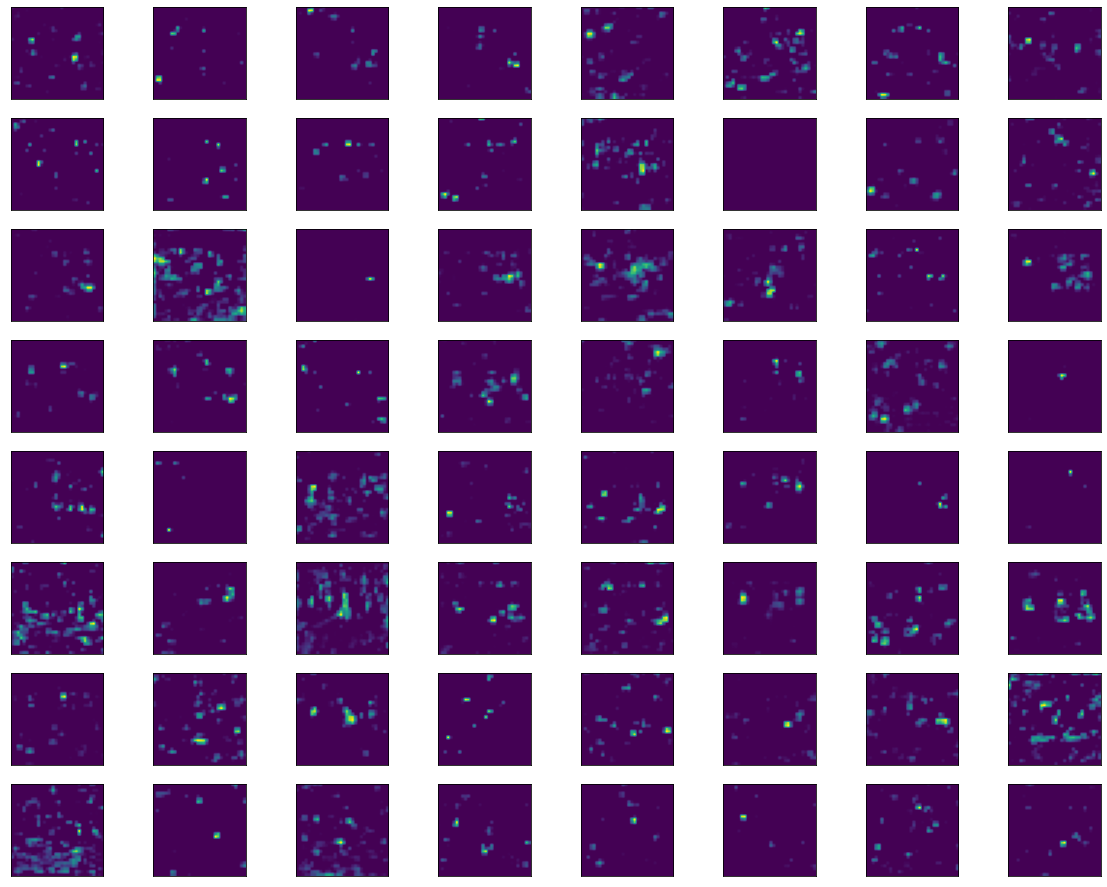

In [29]:
draw_feature_map('../py/img_train/pos/2_A.jpg')

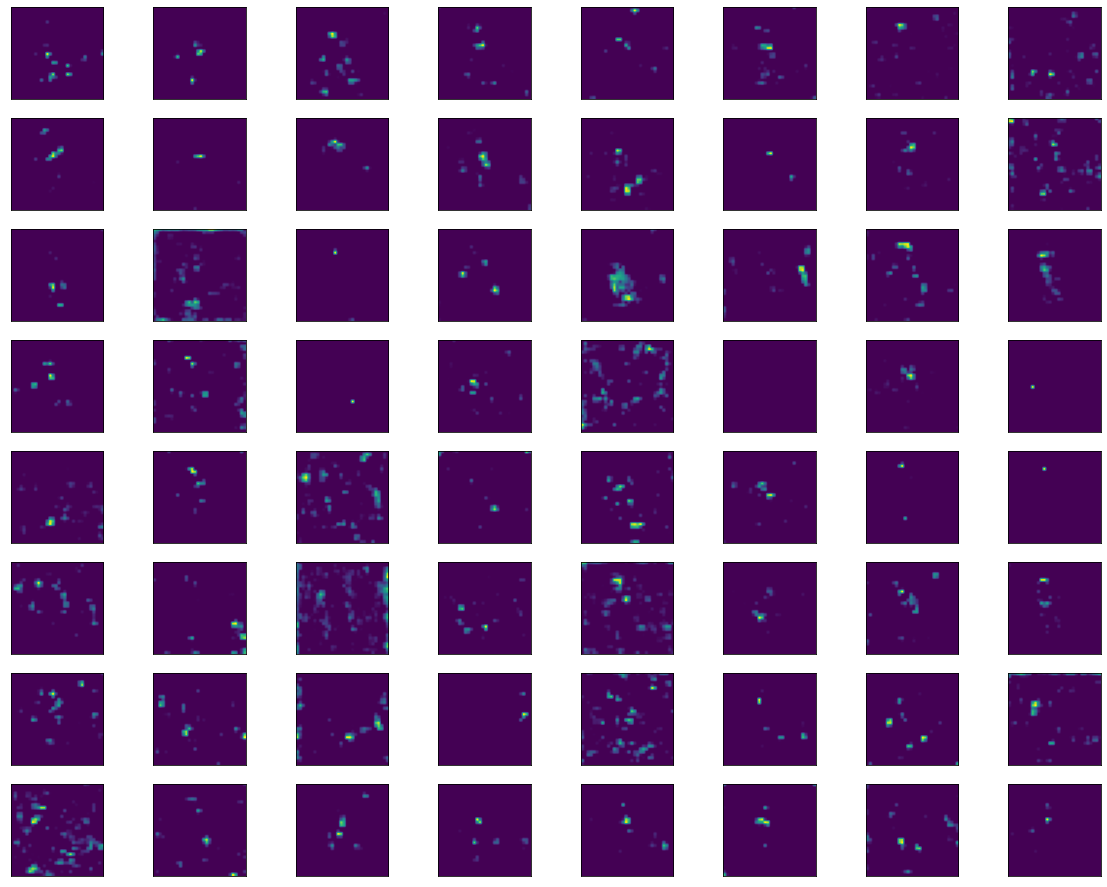

In [30]:
draw_feature_map('../py/img_train/pos/2_B.jpg')

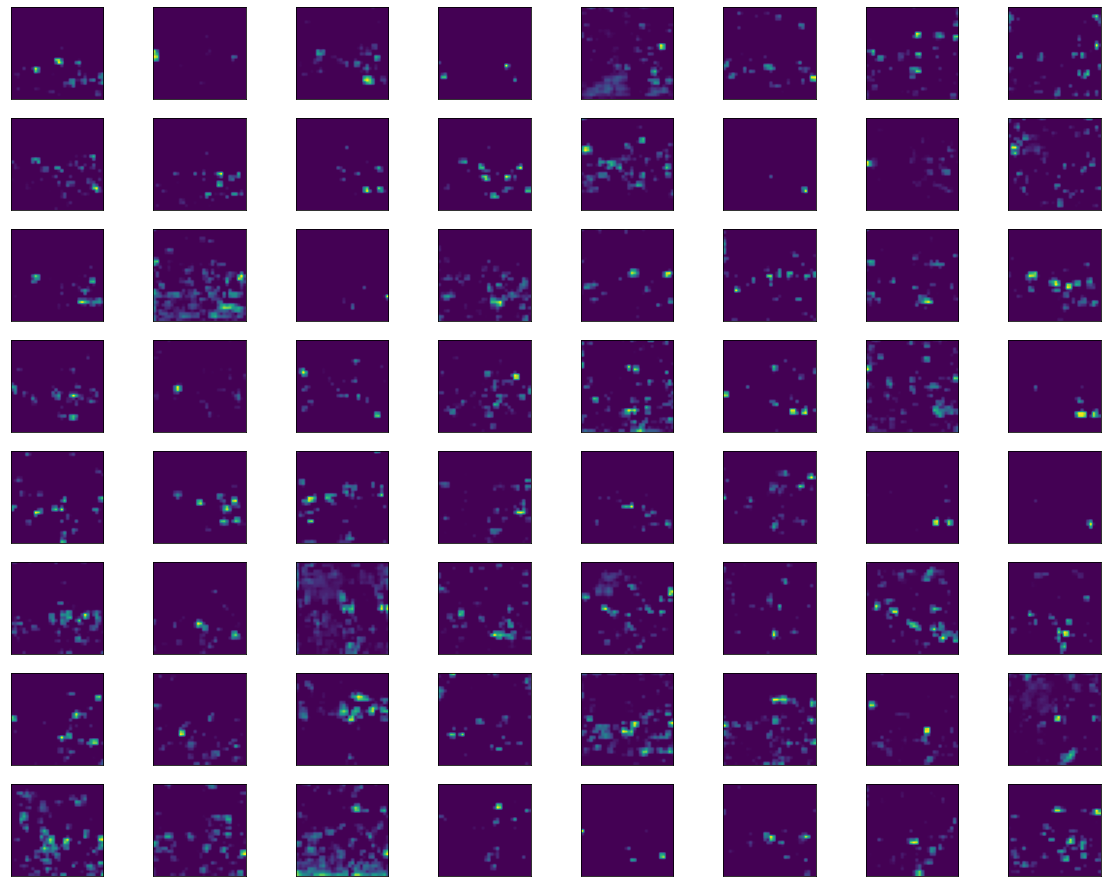

In [31]:
draw_feature_map('../py/img_train/neg/0_A.jpg')

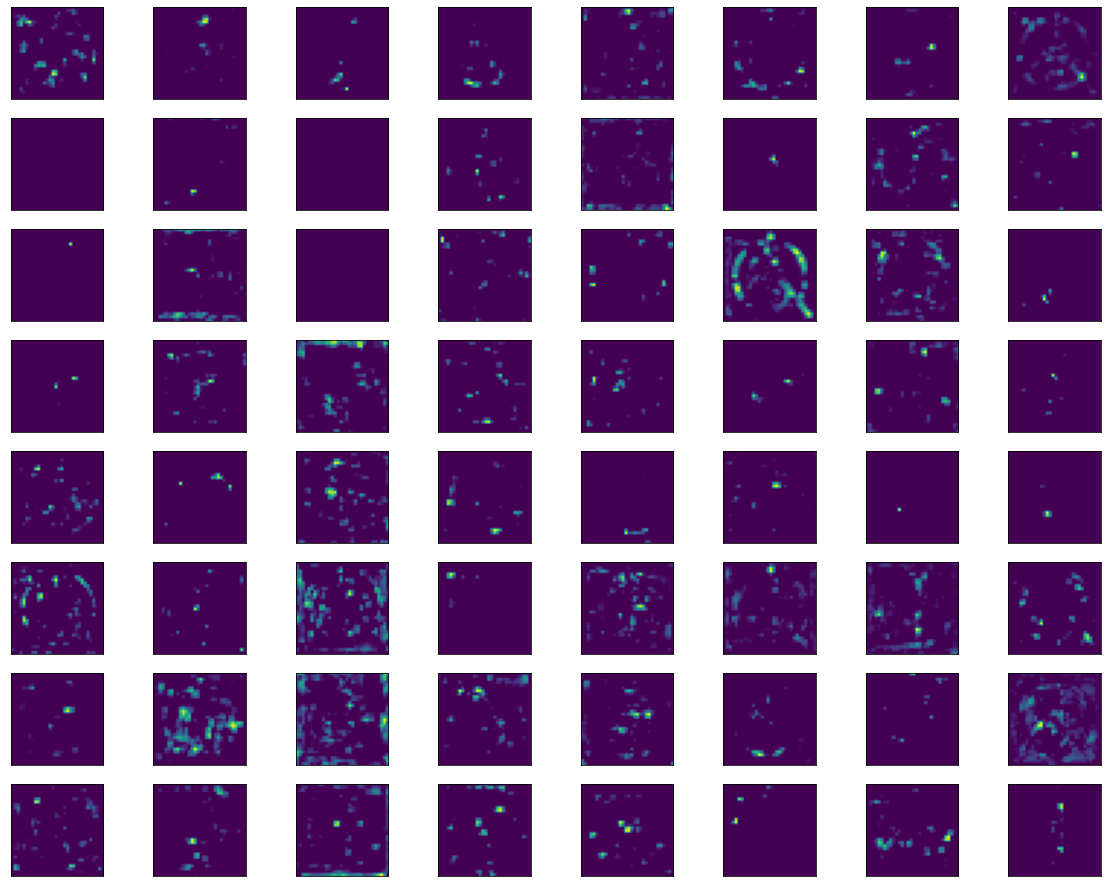

In [32]:
draw_feature_map('../py/img_train/neg/0_B.jpg')